# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

网络局部连接 参数共享 达到减少参数的同时，保持上一层的重要特征，加快计算速度，防止过拟合。

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

(100 - 5 + 1) * (100 - 5 + 1) * 50 + 50   stride default value = 1

#### 3. What are "local invariant" and "parameter sharing" ?

局部不变性：原图像经过卷积核卷积操作得到尺寸减小的图像，新图像每一个pixel对应原图像在卷积核大小内的所有pixel的相关操作，虽减小图像尺寸，但保持了原图像的局部特征，例如用sobel算子在侦测图像边缘信息，原图像的边缘在新图像中会表现为一个个“粗边”。

参数共享：卷积核的ksize*ksize个参数作用于原图像的每一个感受野，感受野与感受野之间权值相同，参数共享。

#### 4. Why we use batch normalization ?

因为在神经网络中每一层的输出作为下一层的输入，随着网络的加深，网络的输出作为激活函数的输入，值越来越向激活函数的的非线性区域即饱和区靠拢，这样在反向传播训练梯度的时候导致梯度消失，收敛变慢。
另外，在反向传播，参数更新的过程中，每一层的数据分布都在变，所以会导致‘internal covariate shif’问题，即每一次的更新参数，输入数据的分布都在变化，使得每一次参数的迭代都要学习一个新的分布
所以引入BN算法，BN算法将每一层的输出转化为一个均值为0，方差为1的标准正态分布，然后对该层的每一个输出可学习两个参数γ、β，可以还原为原始数据的分布。这样使得反向传播训练梯度下降更快，收敛更快。

#### 5. What problem does dropout try to solve ?

参数过多，overfitting

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

correct
AveragePooling层BP求导就是 1/kesize
MaxPooling层BP求导就是对应窗口内最大值为1，其余为0

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

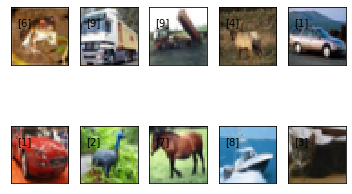

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [36]:
x_train[0].shape

(32, 32, 3)

In [37]:
y_train[0]

array([6], dtype=uint8)

x_train = x_train[:10000,:,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:,:]
y_test = y_test[:1000,:]

In [39]:
y_train.shape

(10000, 1)

In [40]:
y_test.shape

(1000, 1)

In [5]:
x_train = tf.cast(x_train/255, tf.float32)
x_test = tf.cast(x_test/255, tf.float32)

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)
(1000, 32, 32, 3)
(1000, 10)


In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [6]:
from keras import initializers

Using TensorFlow backend.


In [7]:
#build the model with sequential
cifar_10_model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32,[5,5],padding = 'same',activation = 'relu',input_shape = (32,32,3)),
                tf.keras.layers.BatchNormalization(axis = -1),
                tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = 2),
                tf.keras.layers.Conv2D(32,[5,5],padding = 'same',activation = 'relu'),
                tf.keras.layers.BatchNormalization(axis = -1),
                tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides = 2),
                tf.keras.layers.Conv2D(64,[5,5],padding = 'same',activation = 'relu'),
                tf.keras.layers.BatchNormalization(axis = -1),
                tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides = 2),
                tf.keras.layers.Dropout(0.25),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(64,activation = 'relu'),
                tf.keras.layers.BatchNormalization(axis = -1),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(10,kernel_initializer = initializers.random_normal(stddev = 0.1),activation = 'softmax')
])

In [8]:
cifar_10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          5

In [10]:
cifar_10_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                      shuffle = True,
                      loss = tf.keras.losses.categorical_crossentropy,
                      metrics = ['accuracy'])

In [11]:
cifar_10_model.fit(x_train,y_train,batch_size = 200, epochs = 10,validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 71s 2ms/sample - loss: 1.5859 - accuracy: 0.4305 - val_loss: 2.5097 - val_accuracy: 0.1178
Epoch 2/10
45000/45000 [==============================] - 69s 2ms/sample - loss: 1.1776 - accuracy: 0.5846 - val_loss: 1.3628 - val_accuracy: 0.4850
Epoch 3/10
45000/45000 [==============================] - 70s 2ms/sample - loss: 1.0200 - accuracy: 0.6449 - val_loss: 1.0448 - val_accuracy: 0.6296
Epoch 4/10
45000/45000 [==============================] - 71s 2ms/sample - loss: 0.9281 - accuracy: 0.6785 - val_loss: 1.1419 - val_accuracy: 0.6138
Epoch 5/10
45000/45000 [==============================] - 76s 2ms/sample - loss: 0.8583 - accuracy: 0.7023 - val_loss: 1.1647 - val_accuracy: 0.6088
Epoch 6/10
45000/45000 [==============================] - 77s 2ms/sample - loss: 0.8003 - accuracy: 0.7264 - val_loss: 0.7562 - val_accuracy: 0.7404
Epoch 7/10
45000/45000 [==============================] -

In [12]:
from keras.models import load_model

In [13]:
cifar_10_model.save('my_model.h5')

In [14]:
ls

 驱动器 C 中的卷是 Acer
 卷的序列号是 BA06-64FD

 C:\Users\aceryoung\Downloads\NLP\02\0216\作业\Assignment_6 的目录

2020-02-22  16:10    <DIR>          .
2020-02-22  16:10    <DIR>          ..
2020-02-19  16:40    <DIR>          .ipynb_checkpoints
2020-02-22  16:10           118,818 Assignment_6.ipynb
2020-02-22  16:13         1,499,456 my_model.h5
               2 个文件      1,618,274 字节
               3 个目录 51,603,607,552 可用字节


In [15]:
cifar_10_model = tf.keras.models.load_model('my_model.h5')

In [16]:
cifar_10_model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7993265598297119, 0.7163]

发现模型在训练集的精确度为77%，验证集的精确度为73%，测试集的精确度为71%。

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [70]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [76]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = a_prev_slice * W
    
    # Sum over s  
    Z = np.sum(s)
    
    # Add bias b to z.
    Z = Z + b
    
    return Z

In [78]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = [[[-6.99908945]]]


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [86]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = np.pad(X, ((0,0),(pad,pad),(pad,pad),(0,0)), mode = 'constant', constant_values = 0)
    
    return X_pad

In [87]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [171]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2*pad)/stride) + 1
    n_W = int((n_W_prev - f + 2*pad)/stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = h*stride
            vert_end = vert_start + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = w*stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume                   
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,0:n_C_prev]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [172]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [175]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [176]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.

老师 没有BP的部分 ┭┮﹏┭┮